In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

In [2]:
df=pd.read_csv(r'C:\Users\TARUN\Desktop\Tarun\Data Science\Machine Learning\Algorithms\Supervised Learning\Classification\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#age - age in years
#sex - (1 = male; 0 = female)
#cp - chest pain type
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#chol - serum cholestoral in mg/dl
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#target - have disease or not (1=yes, 0=no)

In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Exploration

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

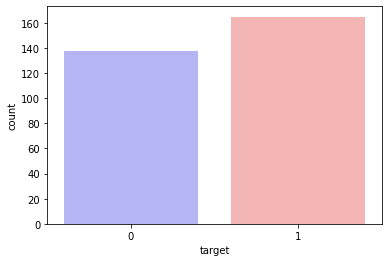

In [9]:
#Visualizing target column
sbs.countplot(x='target',data=df,palette='bwr')
plt.show()

In [10]:
#Calculating the %of people with and without heart disease.
countNoDisease=len(df[df.target==0])
countHaveDisease=len(df[df.target==1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

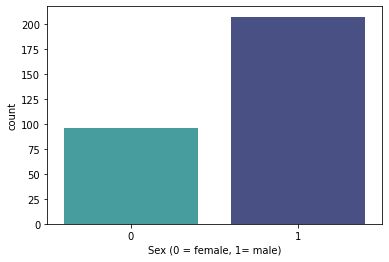

In [12]:
#Visualizing sez column
sbs.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [13]:
#Calculating the %of male and female.
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [14]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


# Age-Target

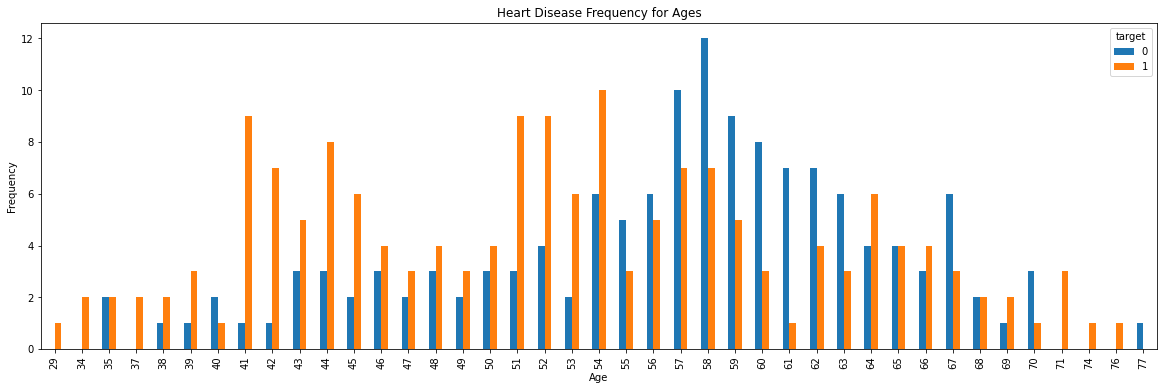

In [15]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))          #0 indicates people with no heart disease(Blue) 
plt.title('Heart Disease Frequency for Ages')                          #1 indicates people with heart disease(Orange)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Sex-Target

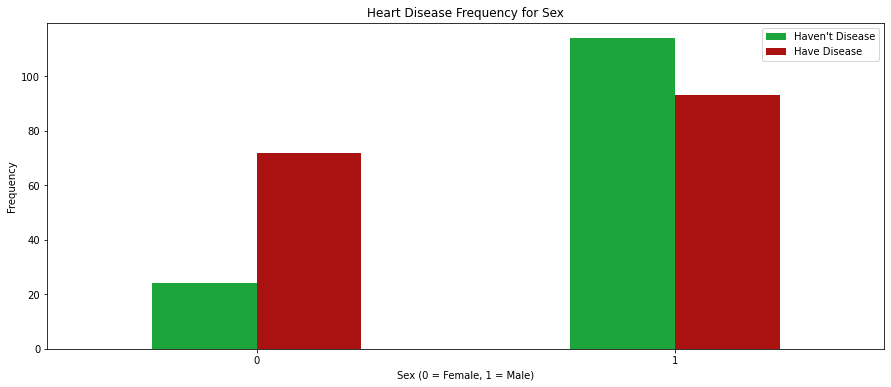

In [16]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# Age-Target-Thalach(Maximum Heart Rate)

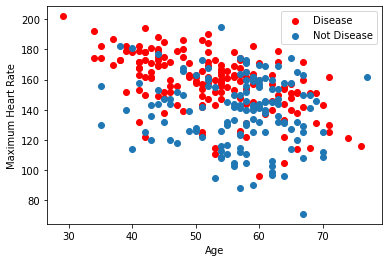

In [17]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Slope-Target

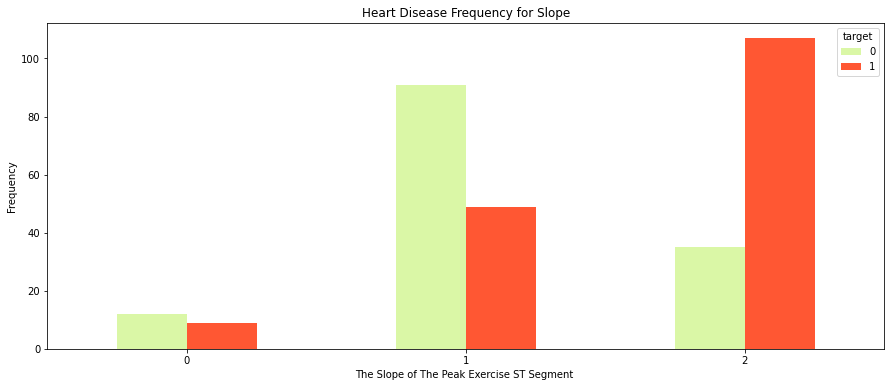

In [18]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Fbs-Target

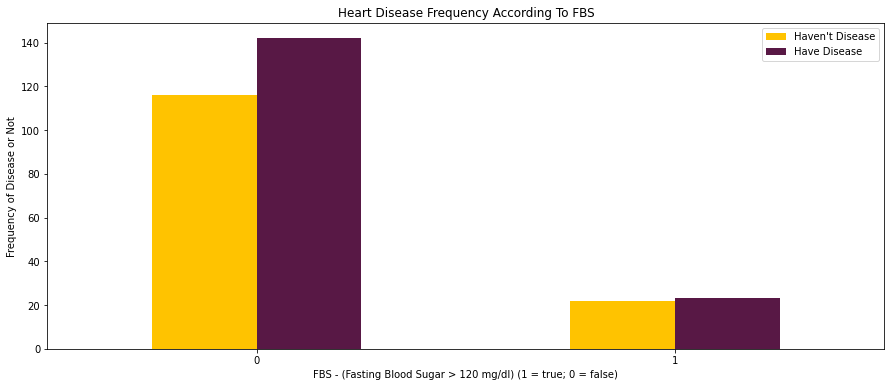

In [19]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Cp-Target

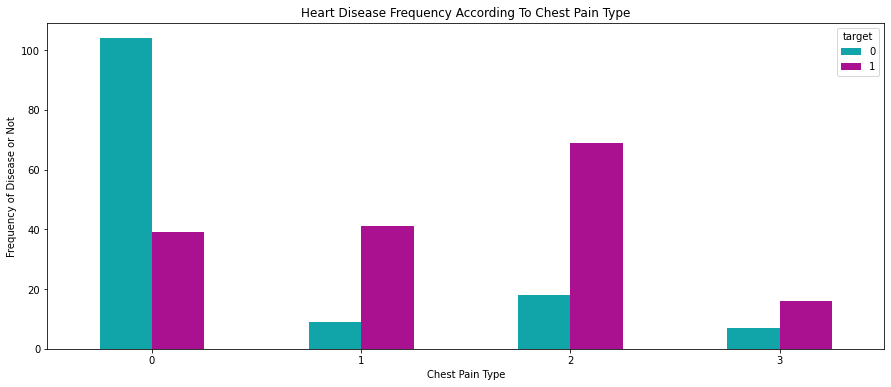

In [20]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Creating Dummy Variables

In [22]:
#Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [23]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [25]:
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [26]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# Dividing the Dataset into Independent Variables(X) and Dependent Variables(y).

In [27]:
x=df.drop('target',axis=1)       #Axis=1 indicates columns.           
y=df['target']                          

In [28]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,0,0,0,0,0,0,1,0,1,0


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# Normalization

In [30]:
X = (x - np.min(x)) / (np.max(x) - np.min(x)).values

In [31]:
X

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Splitting the Dataset into Train set and Test set.

In [32]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1/3, random_state=0)

# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred=dt.predict(X_test)

In [35]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [36]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.71%


# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 1000, random_state = 2) #2
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=2)

In [38]:
y_pred=rf.predict(X_test)

In [39]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [40]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.84%


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred=regressor.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [44]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.83%


# K-Nearest Neighbour(KNN) Classification

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5) #3=79 #4=81 #5=82 #7=78 #8=80
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred=knn.predict(X_test)

In [47]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [48]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.82%


# Support Vector Machine(SVM)

In [49]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [50]:
y_pred=svm.predict(X_test)

In [51]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [52]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.81%


# Naive Bayes Algorithm

In [53]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [54]:
y_pred=nb.predict(X_test)

In [55]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [56]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.83%


# Stochastic Gradient Descent Classifier

In [57]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [58]:
y_pred=sgd.predict(X_test)

In [59]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [60]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.77%


# Linear Discriminant Analysis Classifier

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [62]:
y_pred=lda.predict(X_test)

In [63]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [64]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.83%


# Extra Trees Classifier

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [66]:
y_pred=etc.predict(X_test)

In [67]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [68]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.80%


# Bagging Classifier

In [69]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(X_train,y_train)

BaggingClassifier()

In [70]:
y_pred=bc.predict(X_test)

In [71]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [72]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.79%


# Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [79]:
y_pred=gb.predict(X_test)

In [80]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [82]:
from sklearn import metrics
per=metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy {:.2f}%".format(per))

Test Accuracy 0.82%
